<a href="https://colab.research.google.com/github/DenisKozachok/learnGenAi/blob/lesson2/Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Трансформації для нормалізації даних
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Завантаження навчального набору даних
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

# Завантаження тестового набору даних
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 60.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.78MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.0MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.43MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Перший прихований шар
        self.fc2 = nn.Linear(128, 64)       # Другий прихований шар
        self.fc3 = nn.Linear(64, 10)        # Вихідний шар

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Перетворення тензора зображення
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Логіти (без softmax, оскільки він вбудований у функцію втрат)
        return x

net = Net()


In [3]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Функція втрат
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)  # Оптимізатор


In [4]:
num_epochs = 10  # Кількість епох
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    net.train()  # Режим навчання
    for data in trainloader:
        inputs, labels = data

        optimizer.zero_grad()  # Обнулення градієнтів

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Оцінка на тестовій вибірці
    net.eval()  # Режим оцінки
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = test_loss / len(testloader)
    test_accuracy = 100 * correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Епоха {epoch+1}/{num_epochs}, '
          f'Втрата навчання: {train_loss:.3f}, Точність навчання: {train_accuracy:.2f}%, '
          f'Втрата тесту: {test_loss:.3f}, Точність тесту: {test_accuracy:.2f}%')

print('Навчання завершено')


Епоха 1/10, Втрата навчання: 0.425, Точність навчання: 87.07%, Втрата тесту: 0.234, Точність тесту: 92.29%
Епоха 2/10, Втрата навчання: 0.185, Точність навчання: 94.29%, Втрата тесту: 0.140, Точність тесту: 95.49%
Епоха 3/10, Втрата навчання: 0.132, Точність навчання: 95.92%, Втрата тесту: 0.108, Точність тесту: 96.45%
Епоха 4/10, Втрата навчання: 0.107, Точність навчання: 96.67%, Втрата тесту: 0.104, Точність тесту: 96.74%
Епоха 5/10, Втрата навчання: 0.087, Точність навчання: 97.29%, Втрата тесту: 0.099, Точність тесту: 96.89%
Епоха 6/10, Втрата навчання: 0.078, Точність навчання: 97.56%, Втрата тесту: 0.092, Точність тесту: 97.09%
Епоха 7/10, Втрата навчання: 0.067, Точність навчання: 97.87%, Втрата тесту: 0.083, Точність тесту: 97.37%
Епоха 8/10, Втрата навчання: 0.058, Точність навчання: 98.17%, Втрата тесту: 0.089, Точність тесту: 97.15%
Епоха 9/10, Втрата навчання: 0.053, Точність навчання: 98.28%, Втрата тесту: 0.079, Точність тесту: 97.54%
Епоха 10/10, Втрата навчання: 0.048, 

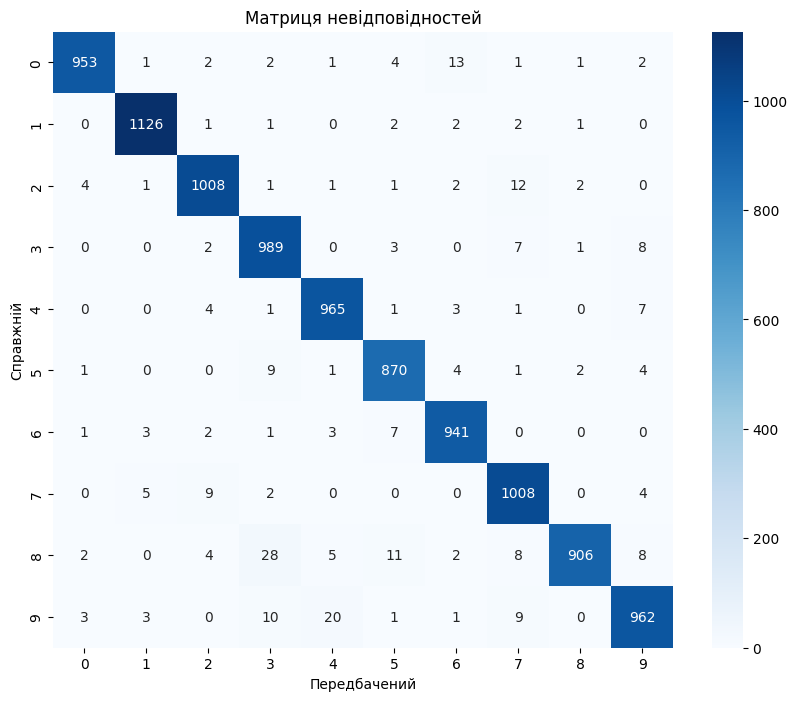

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Передбачення на тестовому наборі
all_preds = []
all_labels = []

net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Матриця невідповідностей
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Передбачений')
plt.ylabel('Справжній')
plt.title('Матриця невідповідностей')
plt.show()


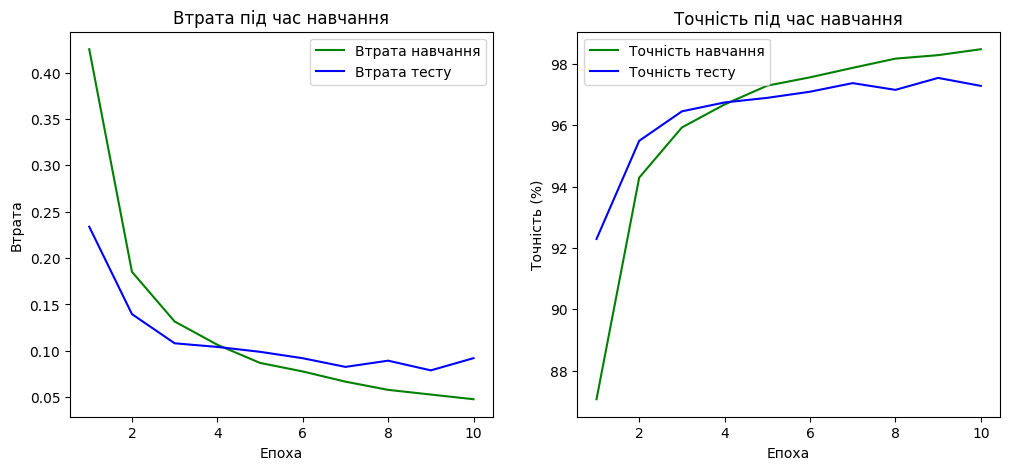

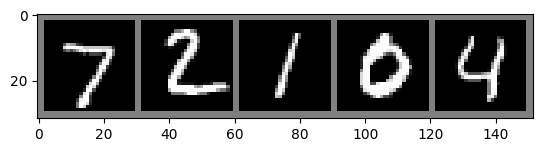

Справжні:     7     2     1     0     4
Передбачені:     7     2     1     0     4


In [7]:
# Візуалізація втрат та точності
epochs = range(1, num_epochs+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses, 'g-', label='Втрата навчання')
plt.plot(epochs, test_losses, 'b-', label='Втрата тесту')
plt.title('Втрата під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, 'g-', label='Точність навчання')
plt.plot(epochs, test_accuracies, 'b-', label='Точність тесту')
plt.title('Точність під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Точність (%)')
plt.legend()

plt.show()

# Візуалізація деяких передбачень
dataiter = iter(testloader)
images, labels = next(dataiter) # Use next(dataiter) instead of dataiter.next()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Функція для відображення зображень
def imshow(img):
    img = img / 2 + 0.5  # Де-нормалізація
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Показати перші 5 зображень з передбаченнями
imshow(torchvision.utils.make_grid(images[:5]))
print('Справжні:', ' '.join('%5s' % labels[j].item() for j in range(5)))
print('Передбачені:', ' '.join('%5s' % predicted[j].item() for j in range(5)))

